https://towardsdatascience.com/a-practical-introduction-to-grid-search-random-search-and-bayes-search-d5580b1d941d

https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb



---



#1. Import Data

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
df_X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_y = pd.DataFrame(cancer['target'], columns=['Cancer'])
df_y.head()

,Cancer
0,0
1,0
2,0
3,0
4,0




---



#2. Train Test Split

In [4]:
# Train test split
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(df_X, np.ravel(df_y), test_size=0.3)



---



#3. Import ML Model - SVC

In [5]:
from sklearn.svm import SVC

In [6]:
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index = [0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769#:~:text=gamma,.fit(X%2C%20y)

##3a) Understanding C

### For Linear Kernel

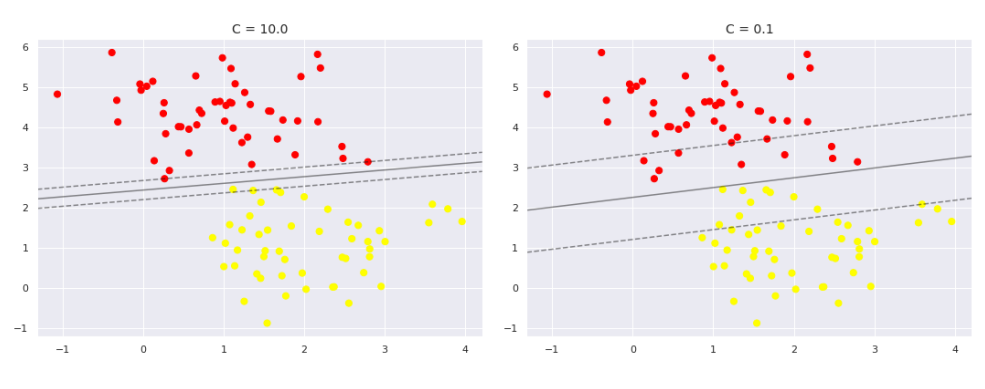

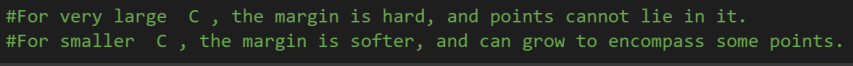

###For RBF Kernel

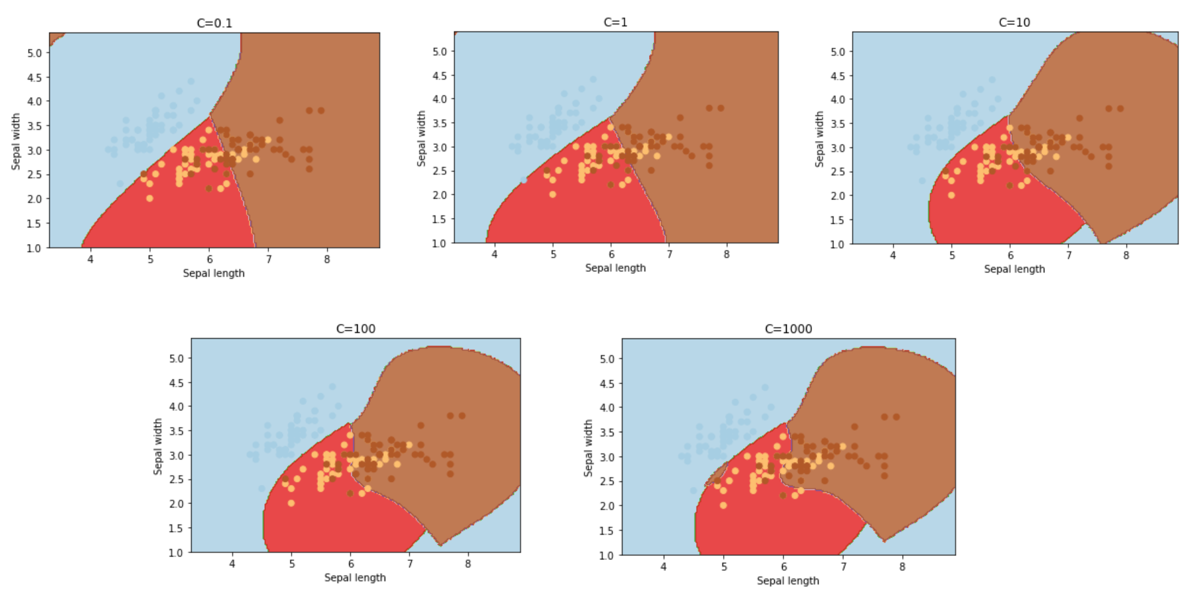

In [7]:
#As C increases above, you notice the brown area shrinking
#You also notice that the brown area is trying to get more and more stringent
#Its trying to include browns (strictly) and trying to exclude the yellow

# C is the strength of the regularization (the penalty term) 
#It controls the trade off between smooth decision boundary 
#and classifying the training points correctly.

#In other words, increasing C means increasing the Penalty by making 
#the model very stringent on the boundaries. 

#However, increasing C values may lead to overfitting the training data.


##3b) Understanding Gamma

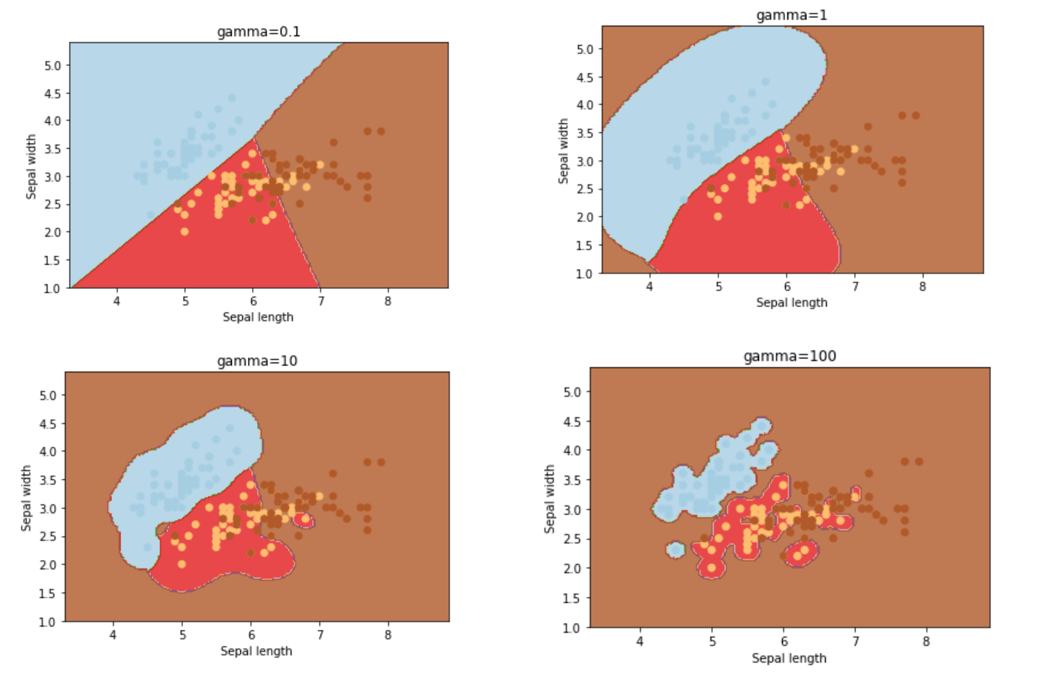

In [8]:
#Gamma is a parameter for non linear hyperplanes. 
#The higher the gamma value it tries to exactly fit the training data set
#We can see that increasing gamma leads to overfitting 
#as the classifier tries to perfectly fit the training data

#Gamma controls the width of the kernel. 

#Gamma = {‘scale’, ‘auto’} or float, default=’scale’
#Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) 
#as value of gamma,

#if ‘auto’, uses 1 / n_features.



##3c) Understanding Kernel

https://www.alvinang.sg/s/Understanding-SVM-with-Python-by-Dr-Alvin-Ang.pdf

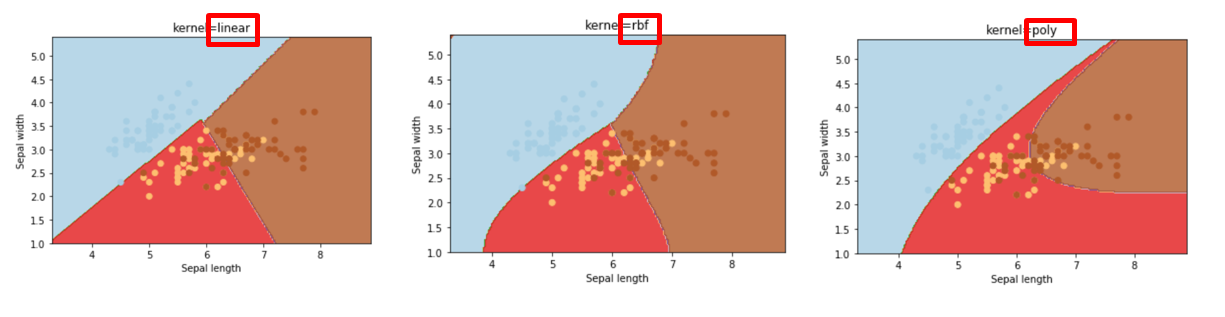

In [9]:
#Default kernel = 'rbf'
# SVC uses radial basis function(RBF) kernel by default (also known as the Gaussian kernel).
#this parameter selects the type of hyperplane used to separate the data. 

#Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). 
#‘rbf’ and ‘poly’ uses a non linear hyper-plane



---



#4. Grid Search 

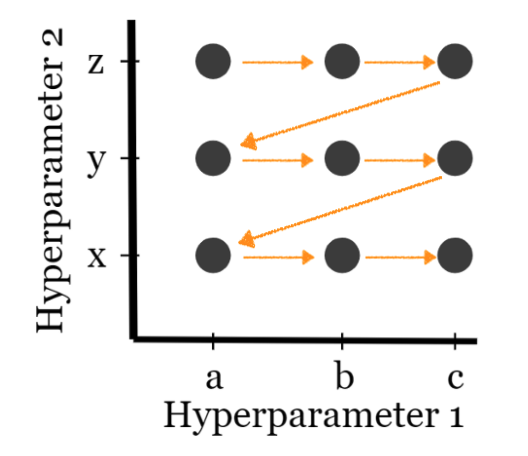

- We want to find the optimal value for C and gamma. 
- Grid Search = creating a “grid” of parameters and just trying out all the possible combinations.

##4a) Defining the Parameter Grid

In [10]:
#defining the Parameter Grid 
#basically defining the values of C and gamma

param_grid = { 
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
} 

##4b) Importing GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = GridSearchCV(
    SVC(), 
    param_grid, 
    refit=True, 
    verbose=3
)

##4c) Default Values for GridSearch

In [12]:
#Default Values

#GridSearchCV(
             #estimator, = the ML model chosen = here is SVC() 
             #param_grid, = the search space = your predefined C and gamma
             
             #scoring=None, = used to measure the model’s performance. 
             #For classification, we generally use ‘accuracy’ or ‘roc_auc’. 
             #For regression, ‘r2’ or ‘neg_mean_squared_error’ is preferred. 
             #default here = none

             #fit_params=None, (ignore)

             #n_jobs=1, = number of parallel jobs to run when executing grid search 
             #If your computer processor has many cores, 
             #set a higher value for this. 
             #The -1 value uses all available cores. 
             #This will speed up the execution process.

             #iid=True, = If True, 
             #the data is assumed to be identically distributed across the folds 

             #refit=True, = refits the the best estimator (SVC) 
             #across the whole dataset
             #If “False”, it is impossible to make predictions 
             #using this GridSearchCV instance after fitting.
             
             #cv=None, = number of folds for cross-validation. 
             #The standard numbers are 5, 10. 
             #If 5, then each hyperparameter combination is repeated 5 times. 
             
             #verbose=0, = the higher, the more messages...
             # we will try this out later to see the effect....

             #pre_dispatch='2*n_jobs', (ignore)
             #error_score='raise') (ignore)

##4d) Training the Grid Search

In [13]:
grid.fit(X_train,y_train)

#if verbose is set to =0, you won't see any messages appear below
#if verbose is set to >0, lots of messages will appear below

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.625 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

##4e) Displaying the BEST Optimal Parameters from GridSearch

In [14]:
# Find the best parameter
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [15]:
# Find the best estimator
grid.best_estimator_

SVC(C=10, gamma=0.0001)

##4f) Using GridSearch to Predict X_test

In [16]:
grid_predictions = grid.predict(X_test)

#grid_predictions are exactly the same as below:
#-----------------------------------------------------------

#from sklearn import svm
#from sklearn.svm import SVC

#svc = svm.SVC(C = 1, gamma = 0.0001).fit(X_train,y_train)
#y_pred = svc.predict(X_test)
#-----------------------------------------------------------

#both yield the same results

#in other words, whether you use "grid.predict()"
#or "svc.predict()" .... is the same....
#but "grid.predict()" simply uses back the best optimal parameters 
#(C = 1, gamma = 0.0001), you don't have to specify them

#like as in svm.SVC(C=1, gamma=0.0001) you need to specify....

##4g) Confusion Matrix and Accuracy

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, grid_predictions))

[[ 58   7]
 [  2 104]]


In [18]:
print(classification_report(y_test, grid_predictions))

#we have an accuracy of 95%

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        65
           1       0.94      0.98      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171





---



#5. Random Search


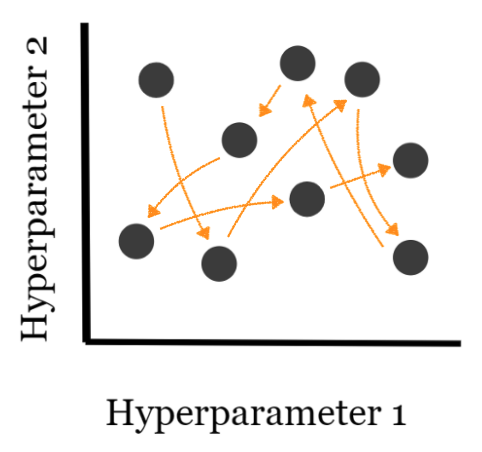

- Grid Search tries all combinations of hyperparameters 
- hence increasing the time complexity of the computation and could result in an unfeasible computing cost. 
- But Random Search tests only combinations preset by you. 
- The selection of the hyperparameter values is completely random.

##5a) Defining the Parameter Distributions

In [19]:
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

# Specify parameters and distributions to sample from
param_dist = {
  'C': stats.uniform(0.1, 1e4),
  'gamma': loguniform(1e-6, 1e+1),
}

##5b) Importing RandomizedSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 20

random_search = RandomizedSearchCV(
    SVC(), 
    param_distributions=param_dist,
    n_iter=n_iter_search, 
    refit=True,
    verbose=3
)

##5c) Understanding "n_iter_search"

In [21]:
#n_iter — Number of hyperparameter combinations to be selected randomly. 
#Random search does NOT check ALL hyperparameter combinations defined in the search space. 
#It considers only a random sample of combinations. 

#Here, n_iter=20 means that it tasks a random sample of 
#size 20 which contain 20 different hyperparameter combinations. 

##5d) Training the Randomized Search

In [22]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=8191.99635590302, gamma=1.5900157693831747;, score=0.625 total time=   0.0s
[CV 2/5] END C=8191.99635590302, gamma=1.5900157693831747;, score=0.625 total time=   0.0s
[CV 3/5] END C=8191.99635590302, gamma=1.5900157693831747;, score=0.637 total time=   0.0s
[CV 4/5] END C=8191.99635590302, gamma=1.5900157693831747;, score=0.633 total time=   0.0s
[CV 5/5] END C=8191.99635590302, gamma=1.5900157693831747;, score=0.633 total time=   0.0s
[CV 1/5] END C=4975.944529057942, gamma=0.7409750217780053;, score=0.625 total time=   0.0s
[CV 2/5] END C=4975.944529057942, gamma=0.7409750217780053;, score=0.625 total time=   0.0s
[CV 3/5] END C=4975.944529057942, gamma=0.7409750217780053;, score=0.637 total time=   0.0s
[CV 4/5] END C=4975.944529057942, gamma=0.7409750217780053;, score=0.633 total time=   0.0s
[CV 5/5] END C=4975.944529057942, gamma=0.7409750217780053;, score=0.633 total time=   0.0s
[CV 1/5] END C=1580.991

RandomizedSearchCV(estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbea0fbfcd0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbea0fbb390>},
                   verbose=3)

##5e) Displaying the BEST Optimal Parameters from Randomized Search

In [23]:
random_search.best_params_

{'C': 7873.930732351023, 'gamma': 4.346073433988365e-06}

In [24]:
random_search.best_estimator_

SVC(C=7873.930732351023, gamma=4.346073433988365e-06)

##5f) Using Randomized Search to Predict X_test

In [25]:
# Run prediction using the best estimator
random_predictions = random_search.predict(X_test)

##5g) Confusion Matrix and Accuracy

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, random_predictions))

[[ 59   6]
 [  2 104]]


In [27]:
print(classification_report(y_test, random_predictions))

#we have an accuracy of 95%

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        65
           1       0.95      0.98      0.96       106

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171





---



#6. Bayes Search

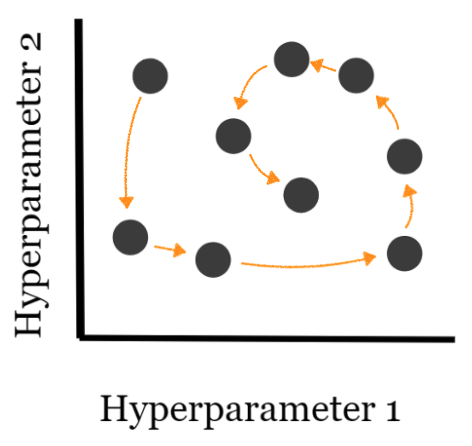

- Bayes Search uses the Bayesian optimization technique to model the search space to arrive at optimized parameter values as soon as possible. 
- It uses the structure of search space to optimize the search time. 
- Bayes Search approach uses the past evaluation results to sample new candidates that are most likely to give better results (shown in the figure below).

In [28]:
pip install scikit_optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.4 MB/s 


##6a) Importing Bayes Search CV

In [29]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

##6b) Defining the Search Space

In [30]:
search_spaces = {
  'C': Real(0.1, 1e+4),
  'gamma': Real(1e-6, 1e+1, 'log-uniform'),
}


##6c) Defining "n_iter_search"

In [31]:
n_iter_search = 20

bayes_search = BayesSearchCV(
    SVC(), 
    search_spaces, 
    n_iter=n_iter_search, 
    cv=5,
    verbose=3
)

##6d) Training the Bayes Search

In [32]:
bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=126.03838171128746, gamma=0.00015583995298190835;, score=0.887 total time=   0.0s
[CV 2/5] END C=126.03838171128746, gamma=0.00015583995298190835;, score=0.900 total time=   0.0s
[CV 3/5] END C=126.03838171128746, gamma=0.00015583995298190835;, score=0.912 total time=   0.0s
[CV 4/5] END C=126.03838171128746, gamma=0.00015583995298190835;, score=0.911 total time=   0.0s
[CV 5/5] END C=126.03838171128746, gamma=0.00015583995298190835;, score=0.924 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=1896.555276567967, gamma=0.04175807509524942;, score=0.625 total time=   0.0s
[CV 2/5] END C=1896.555276567967, gamma=0.04175807509524942;, score=0.625 total time=   0.0s
[CV 3/5] END C=1896.555276567967, gamma=0.04175807509524942;, score=0.637 total time=   0.0s
[CV 4/5] END C=1896.555276567967, gamma=0.04175807509524942;, score=0.633 total time=   0.0s
[CV 5/5] END C=1896.55527

BayesSearchCV(cv=5, estimator=SVC(), n_iter=20,
              search_spaces={'C': Real(low=0.1, high=10000.0, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize')},
              verbose=3)

##6e) Displaying the BEST Optimal Parameters from Bayes Search

In [33]:
bayes_search.best_params_

OrderedDict([('C', 10000.0), ('gamma', 1e-06)])

In [34]:
bayes_search.best_estimator_

SVC(C=10000.0, gamma=1e-06)

##6f) Using Bayes Search to Predict X_test

In [35]:
bayes_predictions = bayes_search.predict(X_test)

##6g) Confusion Matrix and Accuracy

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test, bayes_predictions))

[[ 59   6]
 [  0 106]]


In [37]:
print(classification_report(y_test, bayes_predictions))

#accuracy of 96%!

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        65
           1       0.95      1.00      0.97       106

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171





---



#THE END



---

